<h2>Classification Case-Studies: Logistic Regression</h2>

<ul>
  <li>Data preprocessing</li>
  <li>Exploratory Data Analysis</li>
  <li>Feature Selection and Analysis</li>
  <li>Classification using Logistic Regression</li>
  <li>Feature Analaysis using Logistic Regression</li>
</ul>

<h2>Case Study 1: Early Detection of Parkinson Disease: Predictive modelling and Feature Analysis</h2>

The ElderlyHealth department is a division within MedResearchX Labs dedicated to researching methods for addressing mental health issues affecting the elderly population. One significant focus area within this field is Parkinson's disease, a neurodegenerative disorder characterized by tremors, stiffness, and difficulty with movement. If detected early, Parkinson's disease can be effectively managed. As a data analyst, you've been assigned to develop a data-driven model using historical data ( 'parkinson_disease.csv'). This model aims to accurately <span  style="color:blue"> assess whether an individual has Parkinson's disease or not and 
identify which features are the most explanatory for the disease<span/>.

<b style="color: blue;">Step 1: Load your datasets into pandas</b>

In [5]:
import pandas as pd

df = pd.read_csv('../datasets/parkinson_disease.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


<b style="color: blue;">Step 2: Perform EDA using the following requirements</b>
<ol>
  <li>Count the number of rows with missing records - deal with missing values accordingly </li>
  <li>Provide boxplot and density distribution function for each attribute (except status) in the dataset (optional)</li>
  <li>Provide a barplot that shows the number of data point per class label (see status variable)</li>
</ol>

In [8]:
missing_values = df.isnull().sum(axis=1)
rows_missing_values = (missing_values>0).sum()
print('Number of missing values:',rows_missing_values)

clean_df = df.dropna()

missing_values = clean_df.isnull().sum(axis=1)
rows_missing_values = (missing_values>0).sum()
print('Number of missing values-->after denoising:',rows_missing_values)

Number of missing values: 20
Number of missing values-->after denoising: 0


Text(0.5, 1.0, 'Density plot for PPE')

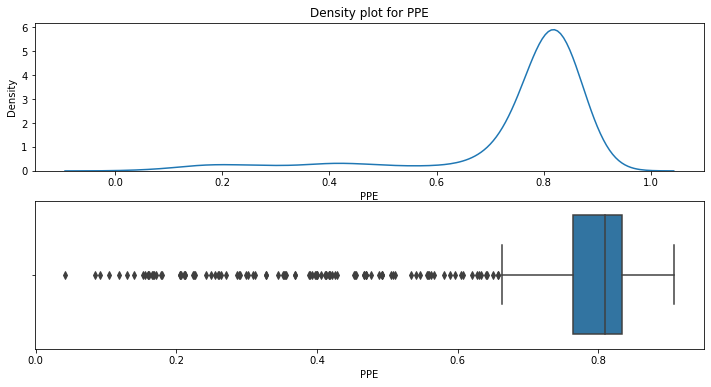

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(12,6))
sns.kdeplot(clean_df['PPE'],ax=axes[0])
sns.boxplot(x=clean_df['PPE'],ax=axes[1])
axes[0].set_title('Density plot for PPE')

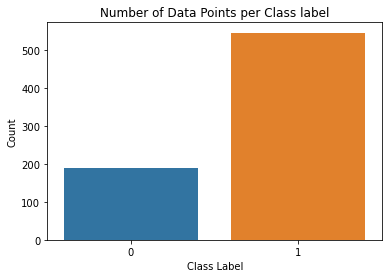

In [14]:
class_counts = clean_df['class'].value_counts()
#class_counts

plt.figure()
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.title('Number of Data Points per Class label')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

<b style="color: blue;">Step 3: Identify features and the target variable in the problem</b>

<b style="color: blue;">Step 4: Feature Engineering, Selection and Analysis</b>

<ol>
    <li>Using Variance thresholding, remove all features below a $\epsilon$ variance level</li>
    <li>Using Mutual Information, rank the importance of each feature against the target variable</li>
    <li>Select the best K features to use in your problem</li>
    <li>You will compare the performance of your model with all features and k features at a later stage</li>
</ol>

<span style="color:blue;">Note: Filter-based feature selection is often used to reduce dimensionality before applying more resource-intense wrapper-based methods. <b>Rule of thumb: 20-30 features is considered low dimensional</b>. Filtering maybe unnecessary.</span>

<span style="color:blue">Why do we filter? Essentially for computational reasons or if domain knowledge requires it. Otherwise use wrapper-based filtering</span>

<b style="color: blue;">Step 5: Scale all features using a Standard Scaler and Split the dataset into Training/Test set (80:20)</b>

<b style="color: blue;">Step 6: Build Logistic Regression Models</b>

<ul>
    <li>Logistic Regression with all features: $Lg_{all}$</li>
    <li>Logistic Regression with remaining features after variance thresholding: $Lg_{var}$</li>
    <li>Logistic Regression with k-selected features: $Lg_{k}$</li>
</ul>

<b style="color: blue;">Step 7: Model Evaluation</b>
<ol>
    <li>Generate Confusion matrices on the test set for each model</li>
    <li>Generate Classification reports for each model </li>
    <li>Comment on the performance of each models</li>
</ol>

<b style="color: blue;">Step 8: Feature Analysis using Logistic Regression</b>
    <ol>
    <li>Using the coefficients of model: $Lg_{all}$, rank the contribution of each feature to identify of Parkinson disease</li>
        <li> Use may use the absolute value of each coefficient as your ranking score: $|\theta_i|$</li>
    <li>Generate a dataframe of feature importance and provide a barplot</li>
    </ol>

<b style="color: blue;">Step 9: Model Training and Wrapper-based Feature Selection</b>

Using all features in the model, implement Sequential Feature Selection to identify
the most optimal feature subset. You may use the $F1_{score}$ as your evaluation metric.
    

<b style="color: blue;">Step 9: Classification Report - Wrapper-based FS</b>

Provide a classification report of your new model on the test set.